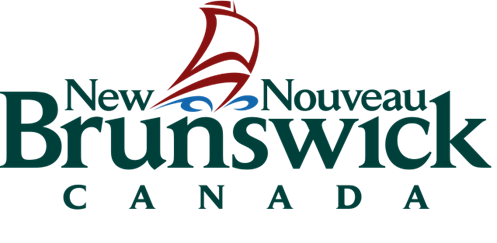

# Virtual Care Utilization

The New Brunswick Department of Health, Health Analytics branch, fosters the strategic use of information and analytics to inform decision making as it relates to the Department’s mandate of planning, funding and monitoring a high quality & sustainable health system for the citizens of New Brunswick.

# About the Data

The world of digital health is continuously expanding and has enormous potential to provide adequate, cost-efficient, safe andscalable eHealth interventions to improve health and health care.**It is time to reimagine the traditional, in-person approach to care.**

Digital health solutions can change the way New Brunswickers receive services and how citizens and providers engage with the health-care system. These services or interventions should bedesigned around the patient’s needs and pertinent informationshould be shared in a proactive and efficient way through smarter use of data, devices, communication platforms and people.

This data set contains an aggregation of patient visits that have occurred during the pandemic. As part of the pandemic response, which includes the new program to support virtual care delivery for the public. The data elements within the data set will allow you to trend the progress of virtual visits, and to describe the characteristics of patients and physicians who have embraced virtual care.The data set contains 113,202 rows including title headers.


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

from sklearn.metrics import mean_squared_error
from math import sqrt
import statsmodels.api as sm

import warnings
warnings.filterwarnings("ignore")

C:\Users\Shivam Goyal\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,
C:\Users\Shivam Goyal\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,


In [4]:
df.head()

,YYYYMM,Year,Month,Age Group Code (Patient),Patient Age Group,Age Group (Patient),Gender (Patient),Patient Gender,Health Zone (Patient),Patient Health Zone,Gender (Physician),Physician Gender,Health Zone (Physician),Physician Health Zone,Visit Type,Number of Visits
0,202112,2021,12,4,0-20 Years,15 - 19 Years,1,Male,3,Fredricton Area,1,Male,7,Miramichi Area,Office,9103
1,202103,2021,3,4,0-20 Years,15 - 19 Years,1,Male,3,Fredricton Area,2,Female,1,Moncton Area,Office,4591
2,202111,2021,11,4,0-20 Years,15 - 19 Years,1,Male,3,Fredricton Area,2,Female,1,Moncton Area,Office,4448
3,202104,2021,4,4,0-20 Years,15 - 19 Years,1,Male,3,Fredricton Area,2,Female,1,Moncton Area,Office,4435
4,202102,2021,2,4,0-20 Years,15 - 19 Years,1,Male,3,Fredricton Area,2,Female,1,Moncton Area,Office,4370


In [5]:
df.columns, len(df.columns)

(Index(['YYYYMM', 'Year', 'Month', 'Age Group Code (Patient)',
        'Patient Age Group', 'Age Group (Patient)', 'Gender (Patient)',
        'Patient Gender', 'Health Zone (Patient)', 'Patient Health Zone',
        'Gender (Physician)', 'Physician Gender', 'Health Zone (Physician)',
        'Physician Health Zone', 'Visit Type', 'Number of Visits'],
       dtype='object'),
 16)

In [6]:
(df.groupby(['Year','Month'])['Number of Visits'].sum().reset_index()).groupby(['Year'])['Number of Visits'].sum().reset_index().mean()

Year                   2020.50
Number of Visits    2436942.75
dtype: float64

In [7]:
(df.groupby(['Year','Patient Gender'])['Number of Visits'].sum().reset_index()).groupby(['Patient Gender'])['Number of Visits'].mean().reset_index()

,Patient Gender,Number of Visits
0,Female,1378825.25
1,Male,1058107.50
2,Not Specified,10.00


In [8]:
df.groupby(['Year'])['Physician Gender'].count().reset_index()

,Year,Physician Gender
0,2019,22627
1,2020,36737
2,2021,43025
3,2022,10812


In [9]:
(df.groupby(['Year','Month'])['Number of Visits'].sum().reset_index()).groupby(['Year'])['Number of Visits'].mean().reset_index().to_csv("Monthly Average Visits.csv")

In [10]:
(df.groupby(['Year','Patient Health Zone'])['Number of Visits'].sum().reset_index()).groupby(['Patient Health Zone'])['Number of Visits'].mean().reset_index()

# .to_csv("Monthly Average Visits.csv")

,Patient Health Zone,Number of Visits
0,Bathurst Area,299642.25
1,Campbellton Area,69923.50
2,Edmunston Area,115816.75
3,Fredricton Area,566323.50
4,Miramichi Area,133572.25
5,Moncton Area,627299.75
6,Saint John Area,615620.50
7,Unknown,8744.25


In [12]:
# Visits Across Time
pd.pivot_table(df, values='Number of Visits', index=['Year', 'Month'],
                    columns=['Visit Type'], aggfunc=np.sum).reset_index().to_csv("Visitsacrosstime.csv",index = False)



In [75]:
# Visits Across Patient Health Zone
pd.pivot_table(df[(df['Year']==2020) | (df['Year']==2021)], 
               values='Number of Visits', index=['Patient Health Zone'],
               columns=['Visit Type'], 
               aggfunc=np.sum).reset_index().to_csv("VisitsPatientHealthZone.csv",index = False)



In [76]:
# Visits Across Physician Health Zone
pd.pivot_table(df[(df['Year']==2020) | (df['Year']==2021)], 
               values='Number of Visits', index=['Physician Health Zone'],
               columns=['Visit Type'], 
               aggfunc=np.sum).reset_index().to_csv("VisitsPhysicianHealthZone.csv",index = False)



In [86]:
# Visits Across Patient Gender
pd.pivot_table(df[(df['Year']==2020) | (df['Year']==2021)], 
               values='Number of Visits', index=['Patient Gender'],
               columns=['Visit Type'], 
               aggfunc=np.sum).reset_index().to_csv("VisitsPatientGender.csv",index = False)


In [78]:
# Visits Across Physician Gender
pd.pivot_table(df[(df['Year']==2020) | (df['Year']==2021)], 
               values='Number of Visits', index=['Physician Gender'],
               columns=['Visit Type'], 
               aggfunc=np.sum).reset_index().to_csv("VisitsPhysicianGender.csv",index = False)


In [80]:
# Visits Across Patient Age Group
pd.pivot_table(df[(df['Year']==2020) | (df['Year']==2021)], 
               values='Number of Visits', index=['Age Group (Patient)'],
               columns=['Visit Type'], 
               aggfunc=np.sum).reset_index().to_csv("VisitsPatientAgeGroup.csv",index = False)


In [88]:
# Visits Across Patient and Physician Health Zone Combined
pd.pivot_table(df[(df['Year']==2020) | (df['Year']==2021)], 
               values='Number of Visits', index=['Patient Health Zone','Physician Health Zone'],
               columns=['Visit Type'], 
               aggfunc=np.sum).reset_index().to_csv("VisitsPatientPhysicianHealthZone.csv",index = False)



In [91]:
# Visits Across Patient Gender & Health Zone Combined
pd.pivot_table(df[(df['Year']==2020) | (df['Year']==2021)], 
               values='Number of Visits', index=['Patient Health Zone','Patient Gender'],
               columns=['Visit Type'], 
               aggfunc=np.sum).reset_index().to_csv("patient healthzone gender.csv",index=False)

In [92]:
# Visits Across Physician Gender & Health Zone Combined
pd.pivot_table(df[(df['Year']==2020) | (df['Year']==2021)], 
               values='Number of Visits', index=['Physician Health Zone','Physician Gender'],
               columns=['Visit Type'], 
               aggfunc=np.sum).reset_index().to_csv("Physician healthzone gender.csv",index=False)

# Forecast

### Moving Average

In [175]:
# Visits Across Patient and Time
forecast_data = pd.pivot_table(df[~(df['Year']==2022)], 
               values='Number of Visits', index=['YYYYMM'],
               columns=['Visit Type'], 
               aggfunc=np.sum).reset_index()

In [179]:
forecast_data = forecast_data.loc[:,['YYYYMM','Virtual Care']]
forecast_data
train = forecast_data.iloc[13:,]

In [182]:
train

Visit Type,YYYYMM,Virtual Care,MA
13,202005,73908.0,NaN
14,202006,170473.0,NaN
15,202007,145645.0,130008.666667
16,202008,125760.0,147292.666667
17,202009,144209.0,138538.000000
18,202010,137580.0,135849.666667
19,202011,140555.0,140781.333333
20,202012,133632.0,137255.666667
21,202101,169229.0,147805.333333
22,202102,154023.0,152294.666667


In [188]:
train['MA'] = train['Virtual Care'].rolling(window=2).mean()

In [189]:
rms = sqrt(mean_squared_error(train.loc[30:,'Virtual Care'],train.loc[30:,'MA']))
print(rms)

4102.423572312672


In [191]:
test = train.loc[30:,]
test

Visit Type,YYYYMM,Virtual Care,MA
30,202110,122944.0,123886.5
31,202111,128506.0,125725.0
32,202112,115565.0,122035.5


In [ ]:
# 3 --5234.994913153281
# 2 --4102.423572312672

In [207]:
fit2.forecast(7)

array([119851.48, 119851.48, 119851.48, 119851.48, 119851.48, 119851.48,
       119851.48])

### Simple Exponential Smoothening

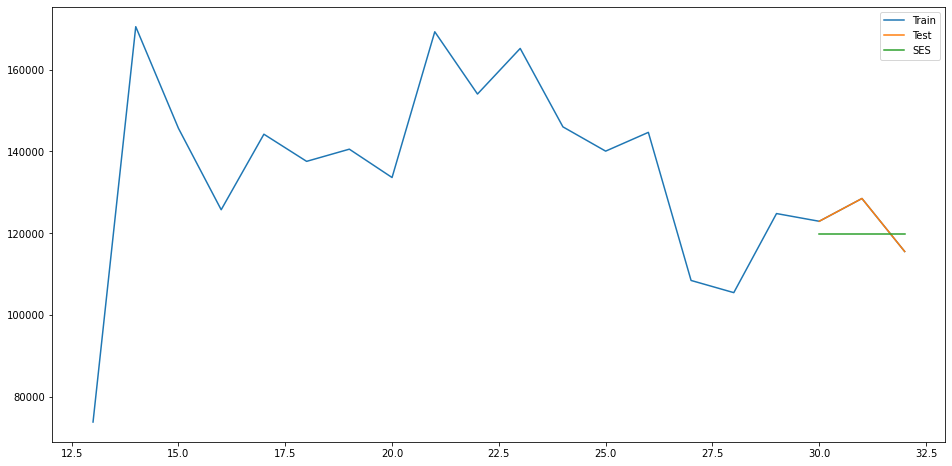

In [199]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

fit2 = SimpleExpSmoothing(np.asarray(train.loc[30:,'Virtual Care'])).fit(smoothing_level=0.6,optimized=False)
test['SES'] = fit2.forecast(len(test))
plt.figure(figsize=(16,8))
plt.plot(train['Virtual Care'], label='Train')
plt.plot(test['Virtual Care'], label='Test')
plt.plot(test['SES'], label='SES')
plt.legend(loc='best')
plt.show()

### Holt's Winters

In [1]:
# import statsmodels.api as sm
# sm.tsa.seasonal_decompose(train['Virtual Care']).plot()
# result = sm.tsa.stattools.adfuller(train['Virtual Care'])
# plt.show()

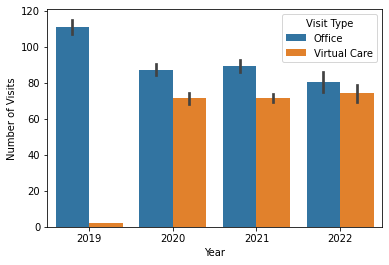

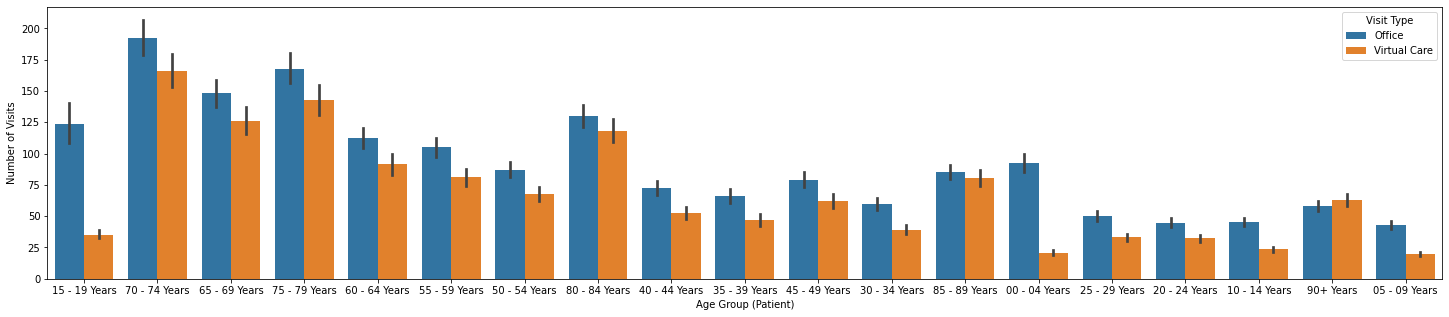

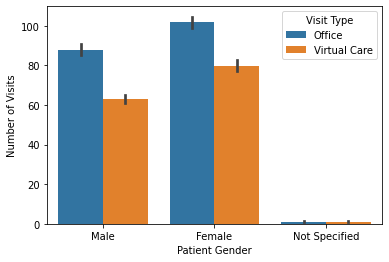

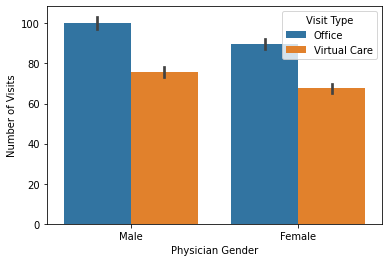

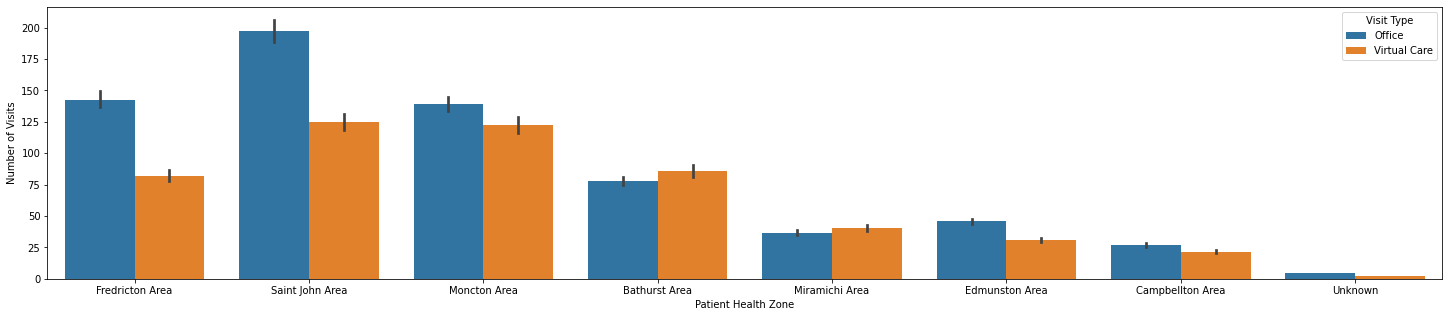

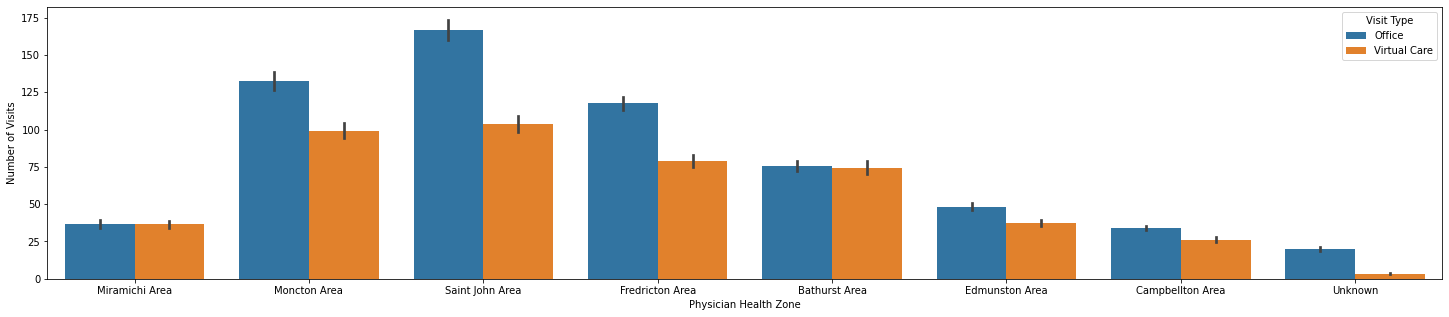

In [275]:
sns.barplot(x = 'Year', y = 'Number of Visits', hue = 'Visit Type', data = df)
#print(df.groupby(['Year', 'Visit Type']).mean()['Number of Visits'])
plt.show()

plt.figure(figsize=(25,5))
sns.barplot(x = 'Age Group (Patient)', y = 'Number of Visits', hue = 'Visit Type', data = df)
plt.show()

sns.barplot(x = 'Patient Gender', y = 'Number of Visits', hue = 'Visit Type', data = df)
plt.show()

sns.barplot(x = 'Physician Gender', y = 'Number of Visits', hue = 'Visit Type', data = df)
plt.show()

plt.figure(figsize=(25,5))
sns.barplot(x = 'Patient Health Zone', y = 'Number of Visits', hue = 'Visit Type', data = df)
plt.show()

plt.figure(figsize=(25,5))
sns.barplot(x = 'Physician Health Zone', y = 'Number of Visits', hue = 'Visit Type', data = df)
plt.show()



## Linear Regression Model

In [288]:
dummies=pd.get_dummies(df,drop_first=True)
df=pd.concat([df,dummies.iloc[:,16:46]],axis=1)
#list(dummies.columns)

df_reg=pd.concat([df.iloc[:,0],df.iloc[:,16:46],df.iloc[:,15]],axis=1)
#df_reg=pd.concat([df.iloc[:,0],df.iloc[:,3],df.iloc[:,28:45],df.iloc[:,15]],axis=1)

x=df_reg.loc[:,df_reg.columns!="Number of Visits"]
y=df_reg["Number of Visits"]

x_train, x_test,y_train,y_test = train_test_split(x,y,test_size =0.3)

In [291]:
regr = linear_model.LinearRegression()
regr.fit(x_train, y_train)

#print('Intercept: \n', regr.intercept_)
#print('Coefficients: \n', regr.coef_)

x = sm.add_constant(x_train) # adding a constant
 
model = sm.OLS(y_train, x_train).fit()
predictions = model.predict(x_test) 
 
print_model = model.summary()
print(print_model)

regr.score(x_test,y_test)


                                 OLS Regression Results                                
Dep. Variable:       Number of Visits   R-squared (uncentered):                   0.218
Model:                            OLS   Adj. R-squared (uncentered):              0.217
Method:                 Least Squares   F-statistic:                              710.9
Date:                Fri, 04 Nov 2022   Prob (F-statistic):                        0.00
Time:                        01:20:15   Log-Likelihood:                     -5.3945e+05
No. Observations:               79240   AIC:                                  1.079e+06
Df Residuals:                   79209   BIC:                                  1.079e+06
Df Model:                          31                                                  
Covariance Type:            nonrobust                                                  
                                             coef    std err          t      P>|t|      [0.025      0.975]
-------------

0.11132790904846412